In [1]:
from game import *
from utils import *
import pandas as pd
from tuning import parallel_tuning, evaluate_TD

In [2]:
from sarsa import sarsa

# hyperparameter tuning for sarsa (manual grid search)
env = MDPGame(random_x=True)
env.load_level(medium_level)

n = 10

parameters = {
    "episodes" : [500, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 3000],
    "alpha" : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35],
    "gamma" : [0.9, 0.95, 0.98, 0.99, 0.999],
    "epsilon" : [0.05, 0.1, 0.15, 0.2, 0.25]
}

result = parallel_tuning(env, sarsa, evaluate_TD, parameters, n)
df = pd.DataFrame(result)

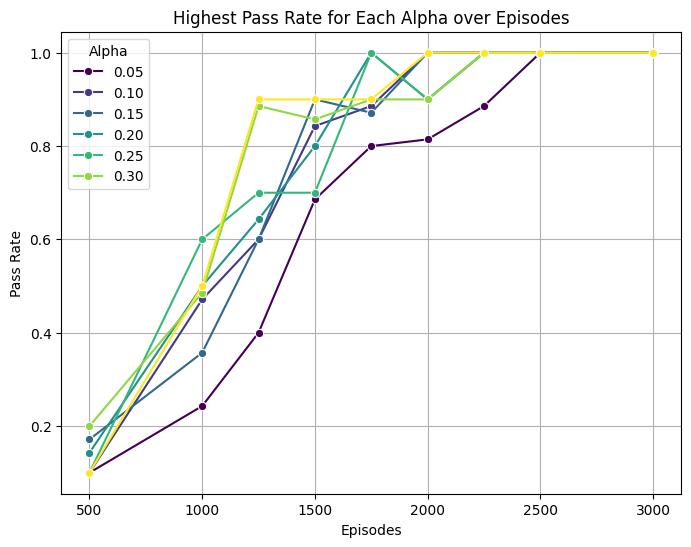

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df_max_alpha_passrate = df.groupby(['alpha', 'episodes'], as_index=False)['pass_rate'].max()

# Plot the results
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_max_alpha_passrate, x='episodes', y='pass_rate', hue='alpha', marker='o', palette='viridis')

plt.xlabel('Episodes')
plt.ylabel('Pass Rate')
plt.title('Highest Pass Rate for Each Alpha over Episodes')
plt.legend(title='Alpha')
plt.grid(True)
plt.show()


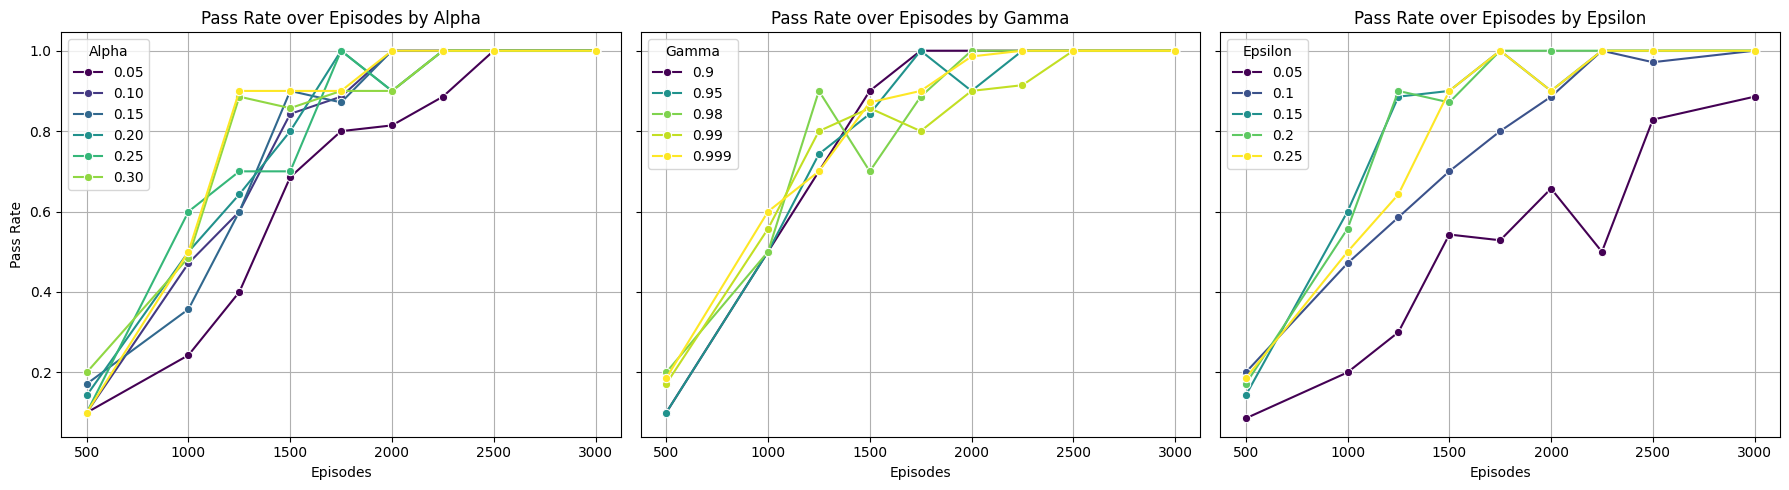

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of hyperparameters to plot
hyperparams = ['alpha', 'gamma', 'epsilon']

# Set up the subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Generate one plot per hyperparameter
for i, hp in enumerate(hyperparams):
    # Group by current hyperparameter and episodes
    df_max = df.groupby([hp, 'episodes'], as_index=False)['pass_rate'].max()

    # Plot on the respective axis
    sns.lineplot(
        data=df_max,
        x='episodes',
        y='pass_rate',
        hue=hp,
        marker='o',
        palette='viridis',
        ax=axes[i]
    )

    axes[i].set_title(f'Pass Rate over Episodes by {hp.capitalize()}')
    axes[i].set_xlabel('Episodes')
    axes[i].set_ylabel('Pass Rate' if i == 0 else '')  # Only left plot shows y-axis label
    axes[i].legend(title=hp.capitalize())
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [5]:
from q_learning import q_learning, double_q_learning

# hyperparameter tuning for sarsa (manual grid search)
env = MDPGame(random_x=True)
env.load_level(medium_level)

n = 10

parameters = {
    "episodes" : [500, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 3000],
    "alpha" : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35],
    "gamma" : [0.9, 0.95, 0.98, 0.99, 0.999],
    "epsilon" : [0.05, 0.1, 0.15, 0.2, 0.25]
}

result = parallel_tuning(env, q_learning, evaluate_TD, parameters, n)
df = pd.DataFrame(result)

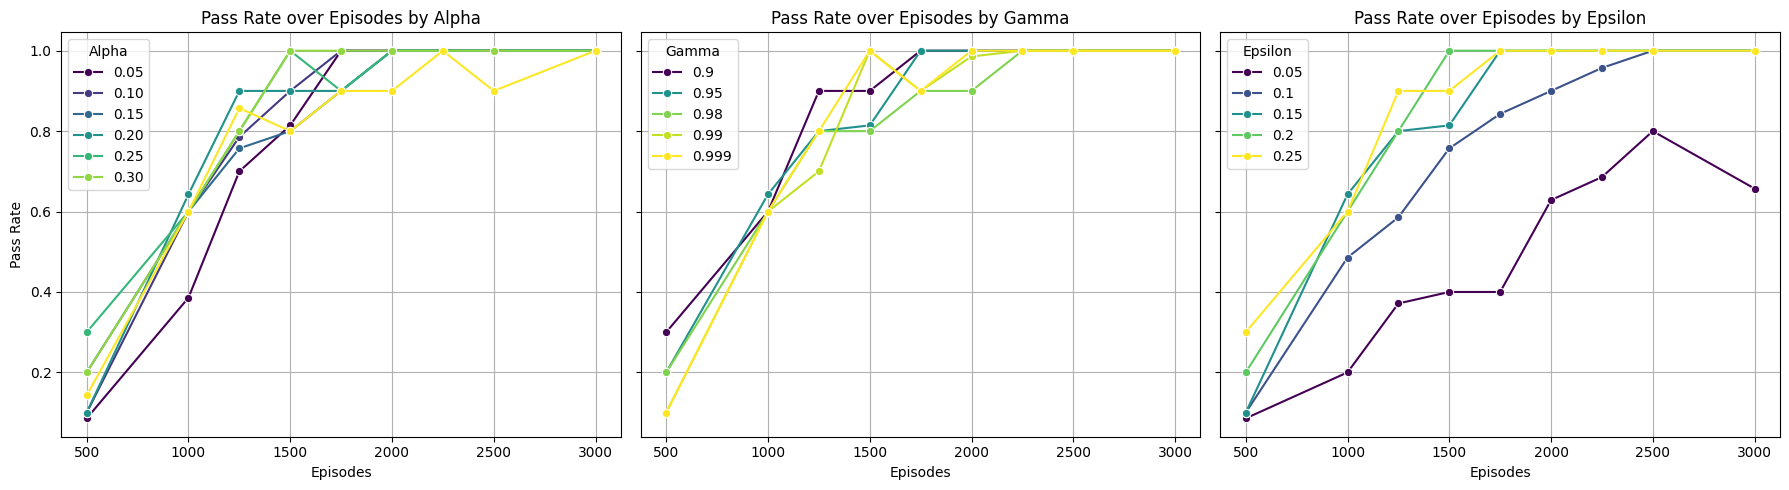

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of hyperparameters to plot
hyperparams = ['alpha', 'gamma', 'epsilon']

# Set up the subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Generate one plot per hyperparameter
for i, hp in enumerate(hyperparams):
    # Group by current hyperparameter and episodes
    df_max = df.groupby([hp, 'episodes'], as_index=False)['pass_rate'].max()

    # Plot on the respective axis
    sns.lineplot(
        data=df_max,
        x='episodes',
        y='pass_rate',
        hue=hp,
        marker='o',
        palette='viridis',
        ax=axes[i]
    )

    axes[i].set_title(f'Pass Rate over Episodes by {hp.capitalize()}')
    axes[i].set_xlabel('Episodes')
    axes[i].set_ylabel('Pass Rate' if i == 0 else '')  # Only left plot shows y-axis label
    axes[i].legend(title=hp.capitalize())
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from monte_carlo_epsilon import mc_control_epsilon_greedy 

# hyperparameter tuning for sarsa (manual grid search)
env = MDPGame(random_x=True)
env.load_level(medium_level)

n = 10

parameters = {
    "episodes" : [1000, 2000, 3000, 4000, 5000],
    "gamma" : [0.9, 0.95, 0.98, 0.99],
    "epsilon" : [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
}

result = parallel_tuning(env, mc_control_epsilon_greedy, evaluate_TD, parameters, n)
df = pd.DataFrame(result)

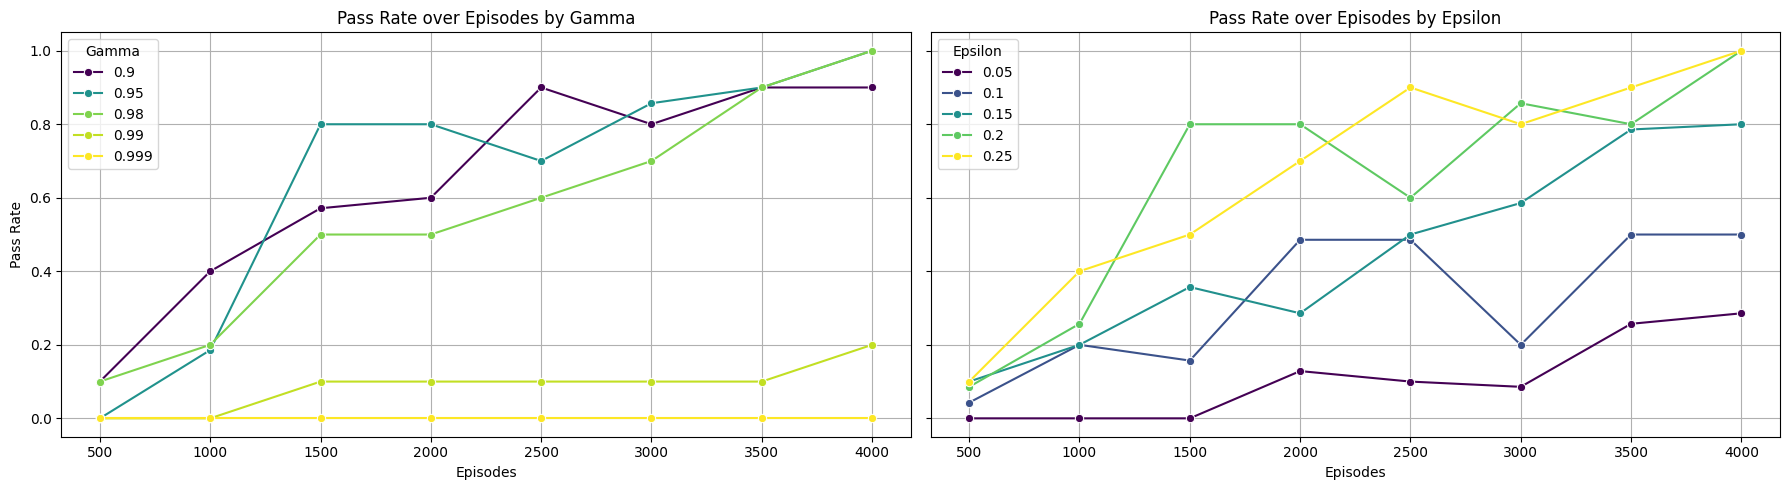

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of hyperparameters to plot
hyperparams = ['gamma', 'epsilon']

fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

# Generate one plot per hyperparameter
for i, hp in enumerate(hyperparams):
    # Group by current hyperparameter and episodes
    df_max = df.groupby([hp, 'episodes'], as_index=False)['pass_rate'].max()

    # Plot on the respective axis
    sns.lineplot(
        data=df_max,
        x='episodes',
        y='pass_rate',
        hue=hp,
        marker='o',
        palette='viridis',
        ax=axes[i]
    )

    axes[i].set_title(f'Pass Rate over Episodes by {hp.capitalize()}')
    axes[i].set_xlabel('Episodes')
    axes[i].set_ylabel('Pass Rate' if i == 0 else '')  # Only left plot shows y-axis label
    axes[i].legend(title=hp.capitalize())
    axes[i].grid(True)

plt.tight_layout()
plt.show()